In [50]:
#importing necessary libraries

import cv2
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [51]:
## Image dataset directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

In [52]:
#use the load_dataset in helpers.py
#loading dataset

IMAGE_LIST = helpers.load_dataset(image_dir_training)

In [53]:
## Standardize the input images
def standardize_output(image):
    return cv2.resize(image,(1100,600))

In [54]:
## Encode the images, by assigning 0/1 to night/day
def encode(label):
    if label=='night':
        return 0
    return 1

In [55]:
## Generate a standardized list of images
# Input : image-label pairs
# Output: list of **standardized** images which are of same size and have numerical labels attached
def standardize(image_list):
    output = []
    for i in image_list:
        image , label = i[0], i[1]
        output.append((standardize_output(image), encode(label)))
    return output

In [56]:
IMAGE_LIST

[(array([[[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [176, 209, 228],
          [177, 210, 229],
          [177, 210, 229]],
  
         [[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [180, 213, 232],
          [180, 213, 232],
          [180, 213, 232]],
  
         [[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [177, 210, 229],
          [177, 210, 229],
          [177, 210, 229]],
  
         ...,
  
         [[ 35,  40,  43],
          [ 38,  43,  46],
          [ 39,  44,  47],
          ...,
          [ 65,  73,  75],
          [ 65,  73,  75],
          [ 65,  73,  75]],
  
         [[ 36,  41,  44],
          [ 38,  43,  46],
          [ 39,  44,  47],
          ...,
          [ 68,  76,  78],
          [ 68,  76,  78],
          [ 65,  73,  75]],
  
         [[ 37,  41,  44],
          [ 38,  43,  46],
          [ 39,  44,  47

In [57]:
## Standardize images by invoking the above functions on real data
STANDARDIZED_LIST = standardize(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


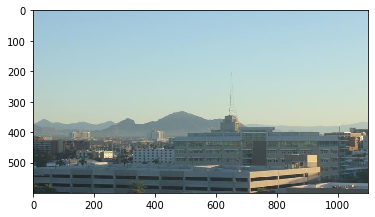

In [58]:
#displaying a standardized image and its label

#select an image by index

image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

#display image and data about it
plt.imshow(selected_image)
print("Shape: " +str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

Label: 1


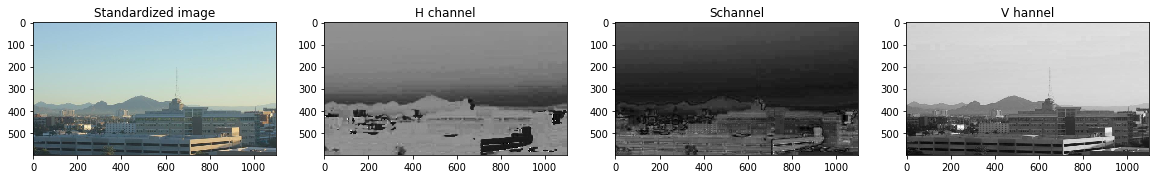

In [59]:
#convert ot HSV colourspace

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

#convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

print("Label: "+ str(test_label))

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap = 'gray')
ax3.set_title('Schannel')
ax3.imshow(s,cmap = 'gray')
ax4.set_title('V hannel')
ax4.imshow(v,cmap = 'gray')



In [60]:
#finding average brightness of an image

def avg_brightness(rgb_image):
    
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    sum_brightness = np.sum(hsv[:,:,2])
    
    area = 600*1100.0
    
    avg = sum_brightness/area
    
    return avg



Avg brightness: 175.1298712121212


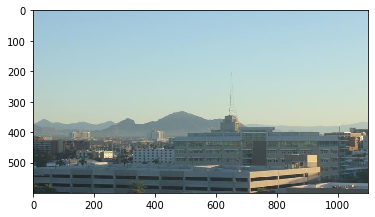

In [61]:
#checking avg brightness of day and night images

image_num = 0 #change image number to see other images for example change it to 150
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)

print('Avg brightness: '+ str(avg))
plt.imshow(test_im)

## Classification

In [62]:
def estimate_label(rgb_image):
    
    avg = avg_brightness(rgb_image)
    
    predicted_label = 0 #by default a night image
    
    threshold = 100
    if (avg > threshold):
        #basically if the brightness of the image is above a particular value we classify it as a day else night
        predicted_label = 1
        
    return predicted_label

## Testing

In [63]:
import random

TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test) #loading test data

STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

random.shuffle(STANDARDIZED_TEST_LIST)  #shuffling the data so that the order does not play a role  in testing accuracy

In [64]:
#list of misclassfied images given a list of test images and their labels

def get_misclassified_images(test_images):
    
    misclassified_images_labels = []
    #creating an emptry list to store all the misclassified images
    
    for image in test_images:
        
        im = image[0]
        true_label = image[1]
        #getting real value
        
        predicted_label = estimate_label(im)
        #getting predicted label from brightness algorithm
        
        if (predicted_label != true_label):
            #comparing real and predicted labels
            misclassified_images_labels.append((im, predicted_label, true_label))
            #if the image is misclassified append it in the list
            
    return misclassified_images_labels

In [66]:
# The misclassfied images in a given test set

MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

#calculating the accuracy
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)

accuracy = num_correct/total

print("Accuracy: " + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) + ' out of ' + str(total))

Accuracy: 0.925
Number of misclassified images = 12 out of 160
